### Customer Personality Analysis Project
`Prasad Jadhav`

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from sklearn.preprocessing import StandardScaler

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import pickle

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_csv('marketing_campaign.csv',sep='\t')
pd.set_option('display.max_columns',100)
dataset['ID'].drop
dataset.shape

(2240, 29)

In [5]:
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [6]:
dataset.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [7]:
print('Number of Rows:',dataset.shape[0])
print('Number of Columns:',dataset.shape[1])

Number of Rows: 2240
Number of Columns: 29


In [8]:
dataset.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
dataset.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [11]:
dataset.duplicated().sum()

0

In [12]:
dataset = dataset.drop_duplicates()
dataset = dataset.dropna()

In [13]:
dataset.cov()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.055845e+07,91.725792,1.071169e+06,3.028930,-5.357445,-4174.184602,-2.310976e+04,947.326959,-4.301363e+03,-4268.426758,-792.235943,-1880.985460,-253.857492,-164.556560,-21.628179,-138.055159,-61.422488,-30.449930,-20.362956,-5.976632,-14.500756,-5.631422,10.754664,0.0,0.0,-24.958764
Year_Birth,9.172579e+01,143.653507,-4.881462e+04,1.503310,-2.287966,-5.653712,-6.446707e+02,-8.464241,-9.058222e+01,-26.528317,-9.946052,-39.875318,-1.352697,-5.028016,-4.271300,-4.982937,3.601796,0.193352,-0.207470,0.033000,-0.028215,-0.009306,-0.035318,0.0,0.0,0.101493
Income,1.071169e+06,-48814.621201,6.336838e+08,-5793.603194,262.102701,-2892.836586,4.913652e+06,431589.325364,3.300781e+06,604886.901055,455689.305153,425110.224539,-4024.230799,26762.859817,43406.478211,43318.897448,-33768.089710,-106.311951,1215.449561,2201.852497,1706.908943,254.730230,-66.412767,0.0,0.0,1197.059729
Kidhome,3.028930e+00,1.503310,-5.793603e+03,0.288258,-0.011649,0.178614,-9.007254e+01,-7.977684,-5.289437e+01,-11.431713,-8.336016,-9.876741,0.224036,-0.547403,-0.792748,-0.875021,0.582689,0.002252,-0.022778,-0.028700,-0.022905,-0.005081,0.002132,0.0,0.0,-0.014950
Teenhome,-5.357445e+00,-2.287966,2.621027e+02,-0.011649,0.296133,0.217990,6.877656e-01,-3.823374,-3.187018e+01,-6.115193,-3.644400,-0.560760,0.404342,0.241750,-0.179482,0.087986,0.173215,-0.006042,0.005468,-0.027033,-0.019309,-0.000976,0.000174,0.0,0.0,-0.029934
Recency,-4.174185e+03,-5.653712,-2.892837e+03,0.178614,0.217990,838.007064,1.535171e+02,-6.731815,1.461987e+02,0.873204,29.854714,26.493442,0.117806,-0.447579,2.040276,-0.040825,-1.303356,-0.243819,0.133150,-0.003633,-0.149343,-0.004686,0.038255,0.0,0.0,-2.066911
MntWines,-2.310976e+04,-644.670673,4.913652e+06,-90.072543,0.687766,153.517126,1.137901e+05,5195.253148,4.303825e+04,7345.671585,5407.865525,6864.460972,5.766284,512.030107,626.671684,701.824559,-263.423371,5.413575,32.958454,41.591494,29.037017,8.039391,-1.290259,0.0,0.0,29.695483
MntFruits,9.473270e+02,-8.464241,4.315893e+05,-7.977684,-3.823374,-6.731815,5.195253e+03,1583.555792,4.889373e+03,1292.967452,934.242986,817.531565,-10.297194,32.944337,56.633209,59.311068,-40.413420,0.149871,0.066640,2.205562,1.869725,-0.045906,-0.020531,0.0,0.0,1.741506
MntMeatProducts,-4.301363e+03,-90.582220,3.300781e+06,-52.894367,-31.870181,146.198697,4.303825e+04,4889.373004,5.030299e+04,7043.475277,4929.552262,4177.244103,-52.339092,188.783642,481.893471,354.345015,-293.461909,1.079757,5.380436,22.007521,17.199809,1.128272,-0.516892,0.0,0.0,19.058398
MntFishProducts,-4.268427e+03,-26.528317,6.048869e+05,-11.431713,-6.115193,0.873204,7.345672e+03,1292.967452,7.043475e+03,2997.790529,1312.988348,1211.802753,-15.087217,44.974938,85.371484,81.472775,-59.282080,-0.003131,0.230893,2.798060,3.508558,0.014840,-0.112592,0.0,0.0,2.116328


In [14]:
dataset.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.002355,0.013095,0.001736,-0.003030,-0.044376,-0.021084,0.007326,-0.005902,-0.023992,-0.005936,-0.011172,-0.040612,-0.018476,-0.002274,-0.013070,-0.007794,-0.035890,-0.023933,-0.007064,-0.018219,-0.014994,0.034154,NaN,NaN,-0.021491
Year_Birth,0.002355,1.000000,-0.161791,0.233615,-0.350791,-0.016295,-0.159451,-0.017747,-0.033697,-0.040425,-0.020204,-0.064208,-0.058668,-0.153051,-0.121764,-0.127891,0.123904,0.061784,-0.066109,0.010575,-0.009611,-0.006717,-0.030407,NaN,NaN,0.023692
Income,0.013095,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.001736,0.233615,-0.428669,1.000000,-0.039869,0.011492,-0.497336,-0.373396,-0.439261,-0.388884,-0.378026,-0.355029,0.216913,-0.371977,-0.504501,-0.501349,0.447477,0.016066,-0.162026,-0.205305,-0.174163,-0.081868,0.040978,NaN,NaN,-0.077909
Teenhome,-0.003030,-0.350791,0.019133,-0.039869,1.000000,0.013838,0.003747,-0.176558,-0.261122,-0.205242,-0.163056,-0.019887,0.386246,0.162077,-0.112692,0.049737,0.131240,-0.042522,0.038376,-0.190791,-0.144855,-0.015521,0.003307,NaN,NaN,-0.153901
Recency,-0.044376,-0.016295,-0.003970,0.011492,0.013838,1.000000,0.015721,-0.005844,0.022518,0.000551,0.025110,0.017663,0.002115,-0.005641,0.024081,-0.000434,-0.018564,-0.032257,0.017566,-0.000482,-0.021061,-0.001400,0.013637,NaN,NaN,-0.199766
MntWines,-0.021084,-0.159451,0.578650,-0.497336,0.003747,0.015721,1.000000,0.387024,0.568860,0.397721,0.390326,0.392731,0.008886,0.553786,0.634753,0.640012,-0.321978,0.061463,0.373143,0.473550,0.351417,0.206185,-0.039470,NaN,NaN,0.246299
MntFruits,0.007326,-0.017747,0.430842,-0.373396,-0.176558,-0.005844,0.387024,1.000000,0.547822,0.593431,0.571606,0.396487,-0.134512,0.302039,0.486263,0.458491,-0.418729,0.014424,0.006396,0.212871,0.191816,-0.009980,-0.005324,NaN,NaN,0.122443
MntMeatProducts,-0.005902,-0.033697,0.584633,-0.439261,-0.261122,0.022518,0.568860,0.547822,1.000000,0.573574,0.535136,0.359446,-0.121308,0.307090,0.734127,0.486006,-0.539484,0.018438,0.091618,0.376867,0.313076,0.043521,-0.023782,NaN,NaN,0.237746
MntFishProducts,-0.023992,-0.040425,0.438871,-0.388884,-0.205242,0.000551,0.397721,0.593431,0.573574,1.000000,0.583867,0.427142,-0.143241,0.299688,0.532757,0.457745,-0.446423,-0.000219,0.016105,0.196277,0.261608,0.002345,-0.021220,NaN,NaN,0.108145


In [15]:
dataset.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [16]:
dataset['Dt_Customer'] = pd.to_datetime(dataset['Dt_Customer'])
dates = []
for i in dataset['Dt_Customer']:
    i = i.date()
    dates.append(i)  
# Dates of the Newest and Oldest Recorded Customer
print('The Newest Customers Enrolment Date in the Records:', max(dates))
print('The Oldest Customers Enrolment Date in the Records:', min(dates))


The Newest Customers Enrolment Date in the Records: 2014-12-06
The Oldest Customers Enrolment Date in the Records: 2012-01-08


Creating a feature **(Customer_For)** of the number of days the customers started to shop in the store relative to the last recorded date

In [17]:
print('Total Categories in the Feature Marital Status:\n', dataset['Marital_Status'].value_counts(), '\n')
print('Total Categories in the Feature Education:\n', dataset['Education'].value_counts())

Total Categories in the Feature Marital Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total Categories in the Feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


#### In the next bit, I will be performing the following steps to engineer some new features:

- Extract the **Age** of a customer by the **Year_Birth** indicating the birth year of the respective person.
- Create another feature **Spent** indicating the total amount spent by the customer in various categories over the span of two years.
- Create another feature **Living With** out of **Marital Status** to extract the living situation of couples.
- Create a feature **Children** to indicate total children in a household that is, kids and teenagers.
- To get further clarity of household, Creating feature indicating **Family Size**
- Create a feature **Is Parent** to indicate parenthood status
- Lastly, I will create three categories in the **Education** by simplifying its value counts.
- Dropping some of the redundant features

In [18]:
dataset['Age'] = 2015 - dataset['Year_Birth']

In [19]:
# Create Another Feature Spent Indicating the Total Amount Spent by the Customer in Various Categories Over the Span of two Years
dataset['Spent'] = dataset['MntWines'] + dataset['MntFruits'] + dataset['MntMeatProducts'] + dataset['MntFishProducts'] + dataset['MntSweetProducts'] + dataset['MntGoldProds']

In [20]:
# Create Another Feature Living_With out of Marital_Status to Extract the Living Situation of Couples
dataset['Living_With'] = dataset['Marital_Status'].replace({'Married':'Partner', 'Together':'Partner', 'Absurd':'Alone', 'Widow':'Alone', 'YOLO':'Alone', 'Divorced':'Alone', 'Single':'Alone'})

In [21]:
# Create Feature Children to Indicate Total Children in Household that is Kids and Teenagers
dataset['Children'] = dataset['Kidhome'] + dataset['Teenhome']

In [22]:
# To Get Further Clarity of Household Creating Feature Indicating Family_Size
dataset['Family_Size'] = dataset['Living_With'].replace({'Alone': 1, 'Partner':2}) + dataset['Children']

In [23]:
# Create Feature Is_Parent to Indicate Parenthood Status
dataset['Is_Parent'] = np.where(dataset.Children > 0, 1, 0)

In [24]:
# Segmenting Education Levels in Three Groups
dataset['Education'] = dataset['Education'].replace({'Basic':'Undergraduate', '2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate', 'PhD':'Postgraduate'})

In [25]:
dataset['Education'].value_counts()

Graduate         1116
Postgraduate      846
Undergraduate     254
Name: Education, dtype: int64

In [26]:
# Dropping Some of the Redundant Features
to_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
dataset = dataset.drop(to_drop, axis=1)

In [27]:
dataset.describe(include=object)

,Education,Living_With
count,2216,2216
unique,3,2
top,Graduate,Partner
freq,1116,1430


In [28]:
dataset['Income'] = dataset['Income'].astype('int64')

In [29]:
int_cols = [x for x in dataset.columns if dataset[x].dtypes=='int64']

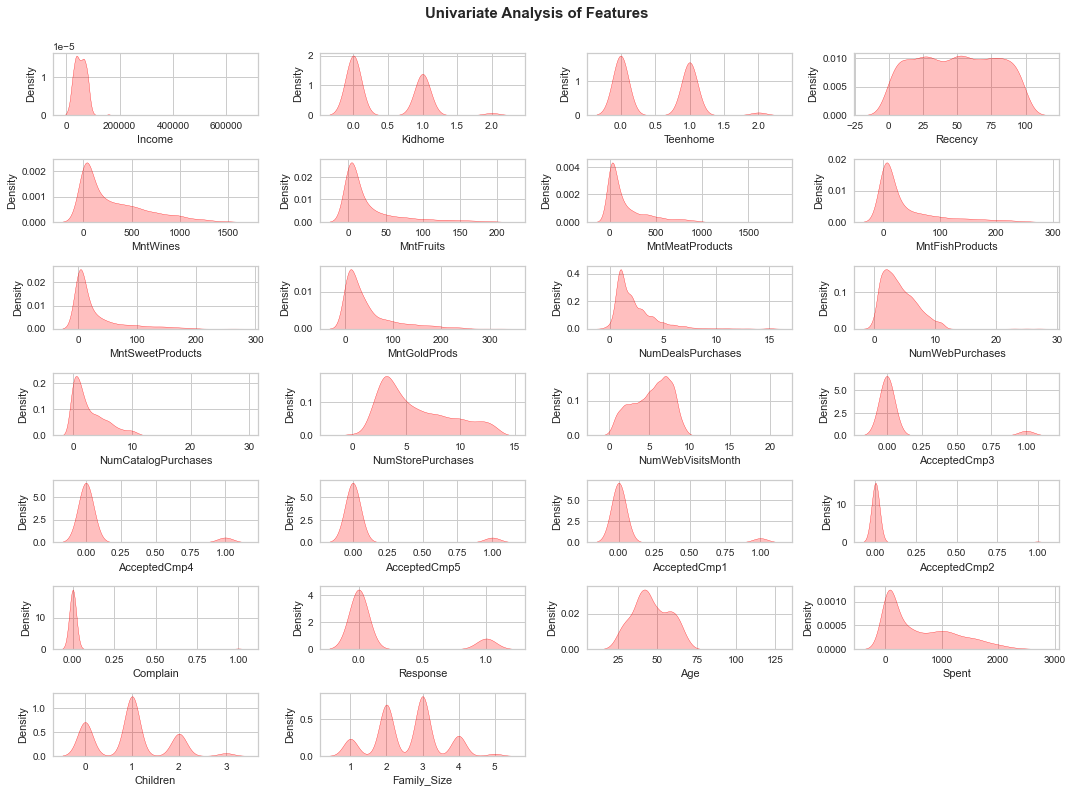

In [30]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Features',fontweight='bold',fontsize=15,y=1)

for i in range(0,len(int_cols)):
    plt.subplot(10,4,i+1)
    sns.kdeplot(x=dataset[int_cols[i]],shade=True,color='red')
    plt.tight_layout()

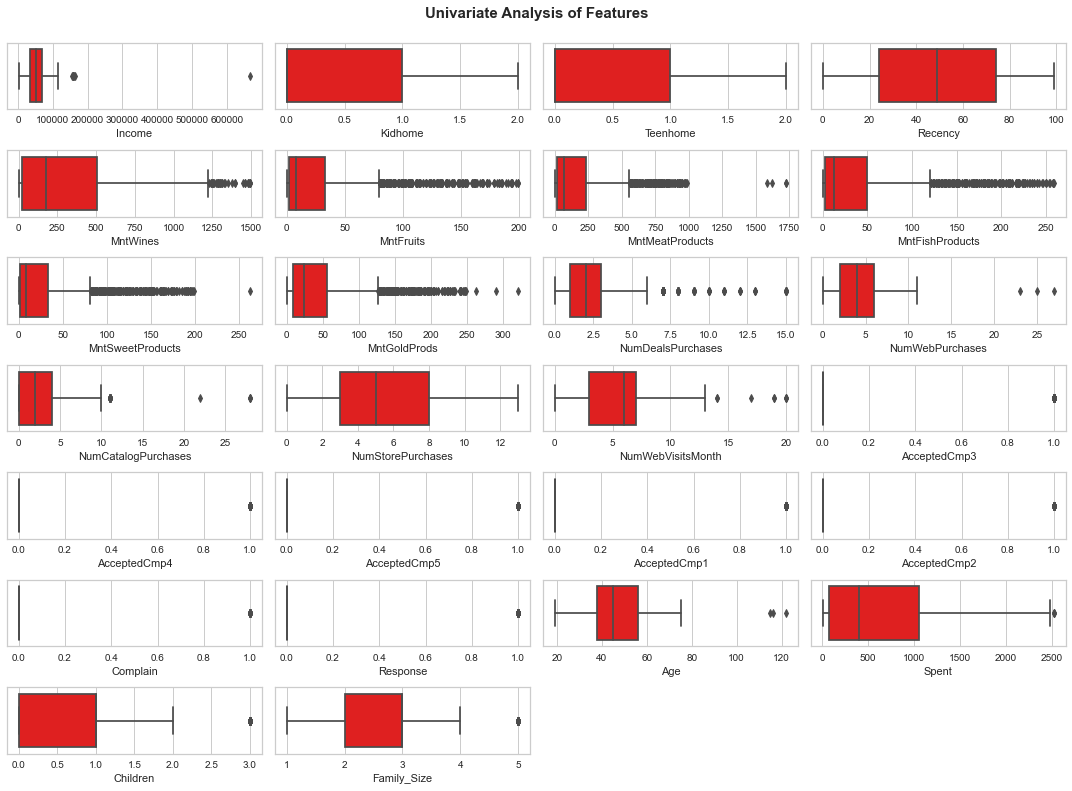

In [31]:
plt.figure(figsize = (15,15))
plt.suptitle('Univariate Analysis of Features',fontweight='bold',fontsize=15,y=1)

for i in range(0,len(int_cols)):
    plt.subplot(10,4,i+1)
    sns.boxplot(data=dataset,x=int_cols[i],color='red')
    plt.xlabel(int_cols[i])
    plt.tight_layout()

In [32]:
def remove_outliers(in_dataset, in_cols):
    
    first_quartile = in_dataset[in_cols].quantile(0.25)
    third_quartile = in_dataset[in_cols].quantile(0.75)
    iqr = third_quartile - first_quartile
    upper_limit = third_quartile + 1.5 * iqr
    lower_limit = first_quartile - 1.5 * iqr
    in_dataset.loc[(in_dataset[in_cols] > upper_limit), in_cols] = upper_limit
    in_dataset.loc[(in_dataset[in_cols] < lower_limit), in_cols] = lower_limit    
    return in_dataset

In [33]:
for features in int_cols:
    dataset = remove_outliers(dataset,features)

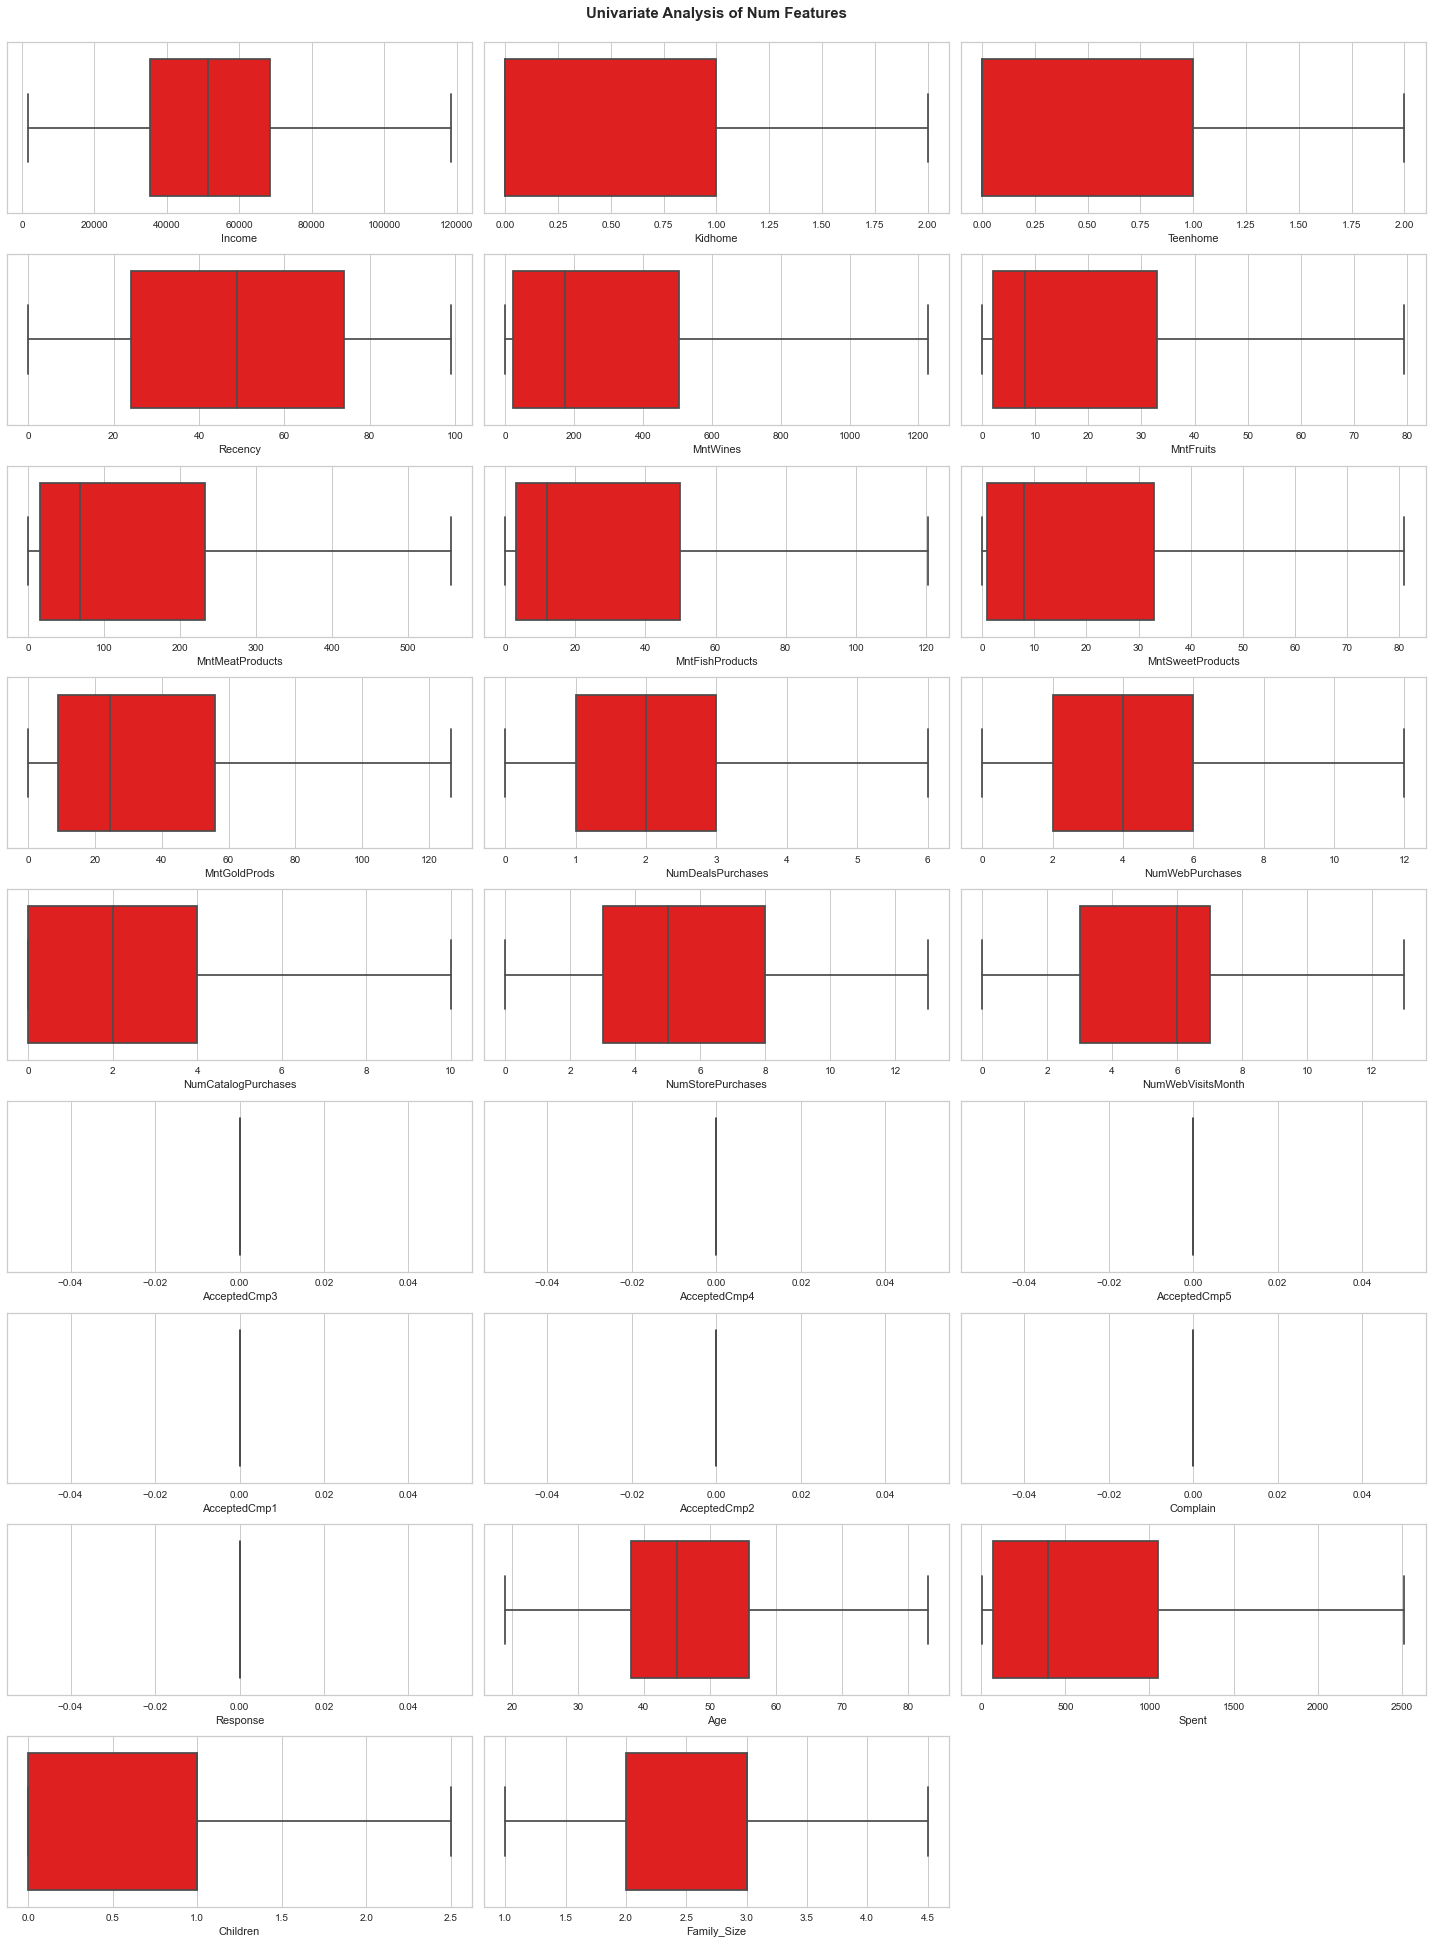

In [34]:
plt.figure(figsize = (20,250))
plt.suptitle('Univariate Analysis of Num Features',fontweight='bold',fontsize=15,y=1)

for i in range(0,len(int_cols)):
    plt.subplot(85,3,i+1)
    sns.boxplot(data=dataset,x=int_cols[i],color='red')
    plt.xlabel(int_cols[i])
    plt.tight_layout()

In [35]:
dataset['Education'] = dataset['Education'].map({'Undergraduate':0, 'Graduate':1, 'Postgraduate':2})

In [36]:
dataset['Living_With'] = dataset['Living_With'].map({'Alone':0, 'Partner':1})

In [37]:
dataset_ = dataset.copy()

In [38]:
cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
dataset = dataset.drop(cols, axis=1)

In [39]:
scaler = StandardScaler()
dataset = pd.DataFrame(scaler.fit_transform(dataset), columns = dataset.columns)

In [40]:
p = PCA(n_components=3)
p.fit(dataset)

PCA(n_components=3)

In [41]:
W = p.components_.T
W

array([[ 0.0115047 ,  0.12649852, -0.53004713],
       [ 0.27489739,  0.16292424, -0.11962516],
       [-0.23678126,  0.01225493,  0.2654858 ],
       [-0.09125217,  0.45338614, -0.18990706],
       [ 0.00411461,  0.01608668,  0.03336764],
       [ 0.25230414,  0.1992376 , -0.09751364],
       [ 0.25300229,  0.02977023,  0.22011482],
       [ 0.29378552,  0.01341948,  0.04971188],
       [ 0.26073307,  0.00633604,  0.21141876],
       [ 0.25442805,  0.02980851,  0.22465691],
       [ 0.19807227,  0.13805477,  0.2316451 ],
       [-0.08581841,  0.37480281,  0.199942  ],
       [ 0.1714831 ,  0.30722832,  0.10003613],
       [ 0.28029255,  0.095361  , -0.00711142],
       [ 0.23888559,  0.20335924,  0.01646727],
       [-0.22059464,  0.06867538,  0.18119689],
       [ 0.03910063,  0.21615001, -0.47999883],
       [ 0.309593  ,  0.11968356,  0.02425567],
       [-0.0250982 ,  0.11982036,  0.20057953],
       [-0.23915457,  0.34003332,  0.05445254],
       [-0.20944241,  0.343218  ,  0.150

In [42]:
p.explained_variance_

array([8.84485331, 3.00939489, 1.4211903 ])

In [43]:
p.explained_variance_ratio_

array([0.40185736, 0.13672895, 0.06457041])

In [44]:
p.explained_variance_ratio_.cumsum()

array([0.40185736, 0.53858631, 0.60315672])

In [45]:
df_PCA = pd.DataFrame(p.transform(dataset), columns=(['col1', 'col2', 'col3']))
df_PCA.describe()

,col1,col2,col3
count,2.216000e+03,2.216000e+03,2.216000e+03
mean,5.771557e-17,5.130272e-17,7.214446e-17
std,2.974030e+00,1.734761e+00,1.192137e+00
min,-5.240740e+00,-4.467226e+00,-3.523719e+00
25%,-2.669935e+00,-1.356154e+00,-8.439076e-01
50%,-8.383378e-01,-1.761447e-01,-1.937255e-02
75%,2.576374e+00,1.304852e+00,8.090978e-01
max,7.061699e+00,6.021667e+00,5.029504e+00


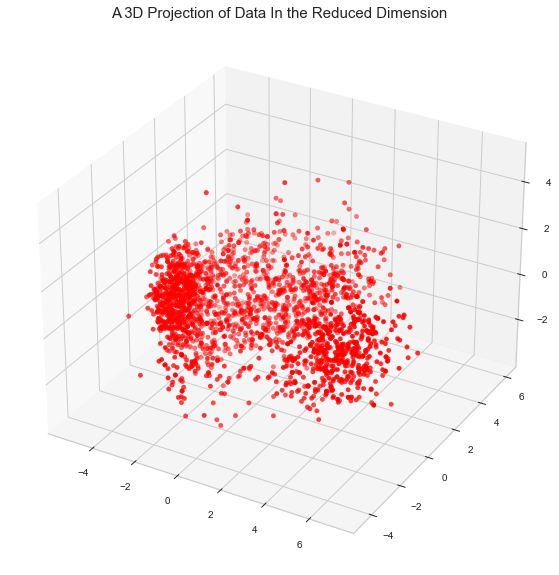

In [54]:
x = df_PCA['col1']
y = df_PCA['col2']
z = df_PCA['col3']

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='red', marker='o')
ax.set_title('A 3D Projection of Data In the Reduced Dimension', fontsize=15)
plt.show()

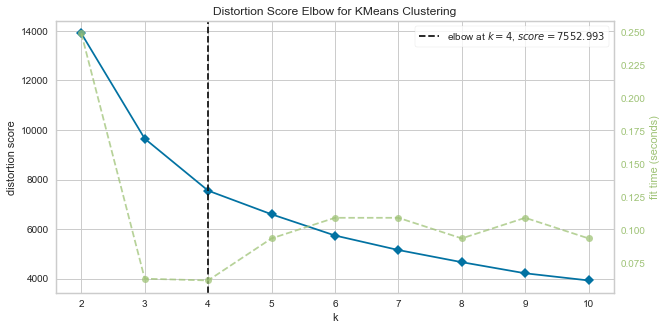

In [46]:
plt.figure(figsize=(10,5))
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_PCA)
Elbow_M.show()
plt.show()

In [47]:
AC = AgglomerativeClustering(n_clusters=4)
yhat_AC = AC.fit_predict(df_PCA)
df_PCA['Clusters'] = yhat_AC
dataset['Clusters'] = yhat_AC
dataset_['Clusters'] = yhat_AC

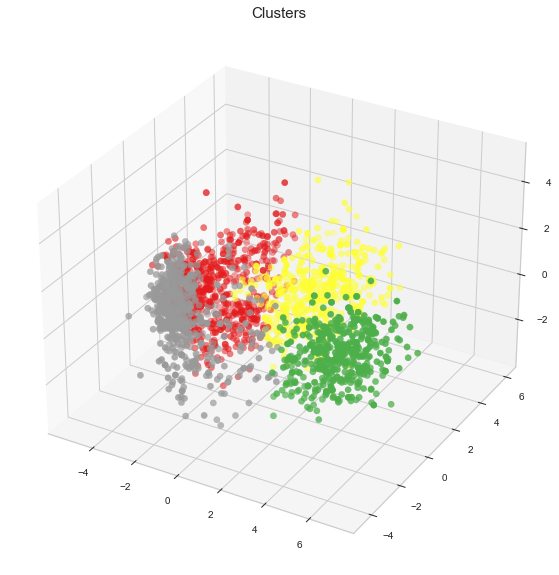

In [55]:
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x, y, z, s=40, c=df_PCA['Clusters'], marker='o', cmap='Set1_r')
ax.set_title('Clusters', fontsize=15)
plt.show()

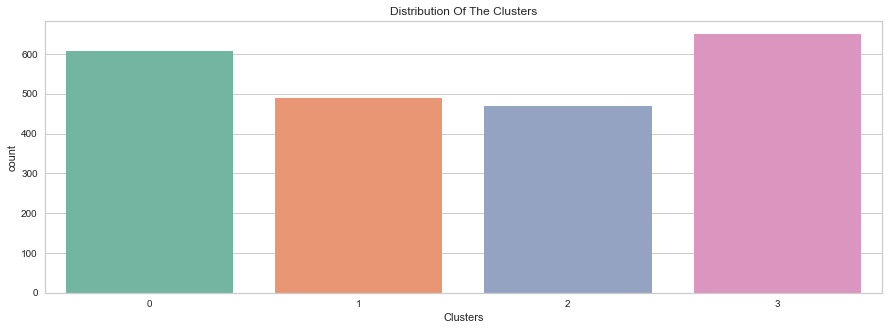

In [46]:
plt.figure(figsize=(15,5))
pl = sns.countplot(x=dataset['Clusters'], palette='Set2')
pl.set_title('Distribution Of The Clusters')
plt.show()

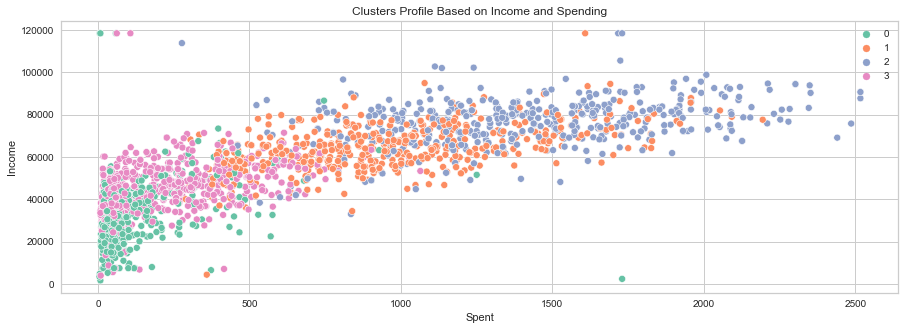

In [47]:
plt.figure(figsize=(15,5))
pl = sns.scatterplot(data=dataset_, x=dataset_['Spent'], y=dataset_['Income'], hue=dataset_['Clusters'], palette='Set2')
pl.set_title('Clusters Profile Based on Income and Spending')
plt.legend()
plt.show()

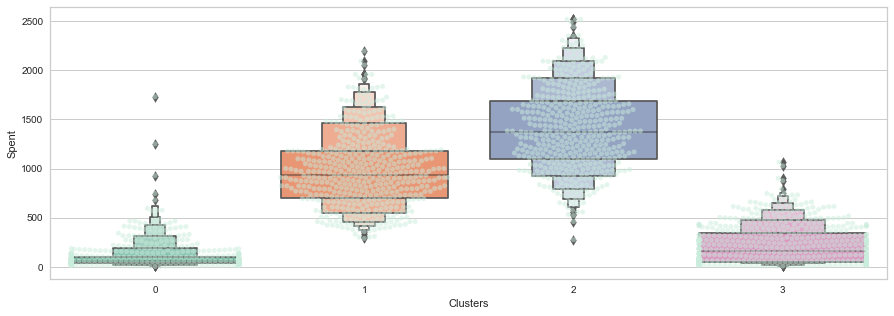

In [48]:
plt.figure(figsize=(15,5))
pl = sns.swarmplot(x=dataset_['Clusters'], y=dataset_['Spent'], color='#CBEDDD', alpha=0.5)
pl = sns.boxenplot(x=dataset_['Clusters'], y=dataset_['Spent'], palette='Set2')
plt.show()

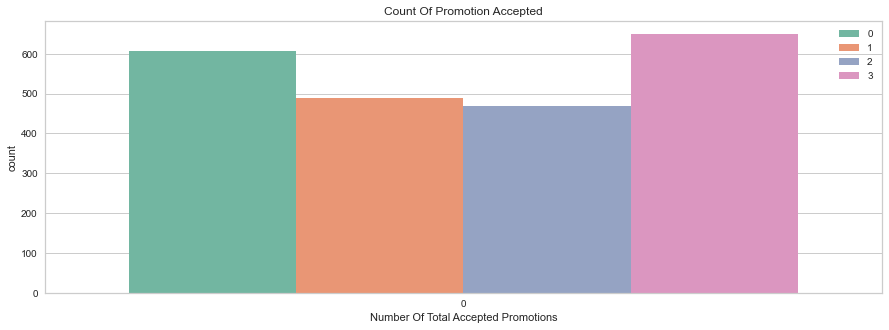

In [51]:
dataset_['Total_Promos'] = dataset_['AcceptedCmp1'] + dataset_['AcceptedCmp2'] + dataset_['AcceptedCmp3'] + dataset_['AcceptedCmp4'] + dataset_['AcceptedCmp5']

plt.figure(figsize=(15,5))
pl = sns.countplot(x=dataset_['Total_Promos'], hue=dataset_['Clusters'], palette='Set2')
pl.set_title('Count Of Promotion Accepted')
pl.set_xlabel('Number Of Total Accepted Promotions')
plt.legend(loc='upper right')
plt.show()

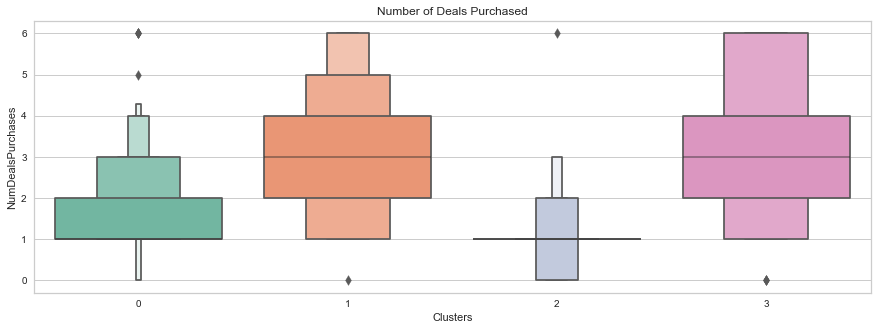

In [52]:
plt.figure(figsize=(15,5))
pl = sns.boxenplot(y=dataset_['NumDealsPurchases'], x=dataset_['Clusters'], palette='Set2')
pl.set_title('Number of Deals Purchased')
plt.show()

<Figure size 1080x360 with 0 Axes>

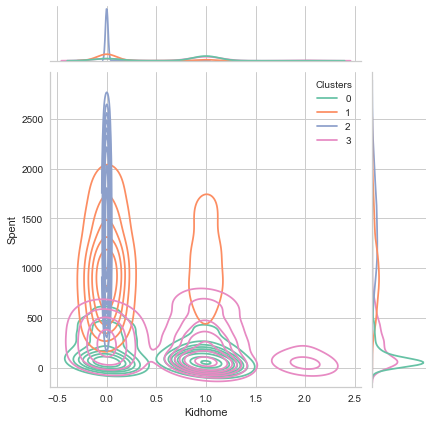

<Figure size 1080x360 with 0 Axes>

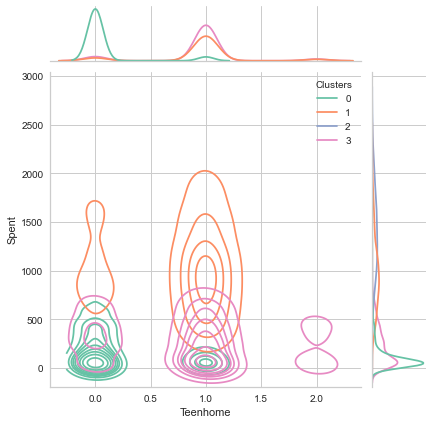

<Figure size 1080x360 with 0 Axes>

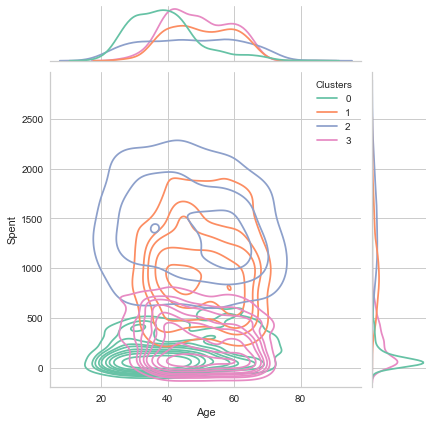

<Figure size 1080x360 with 0 Axes>

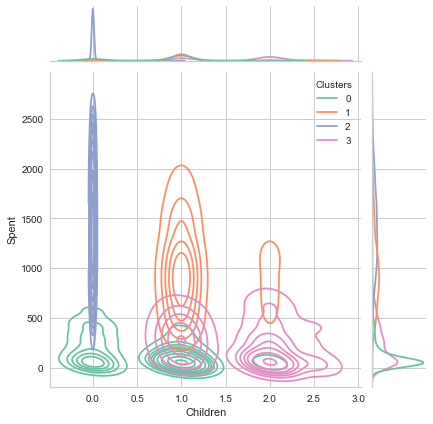

<Figure size 1080x360 with 0 Axes>

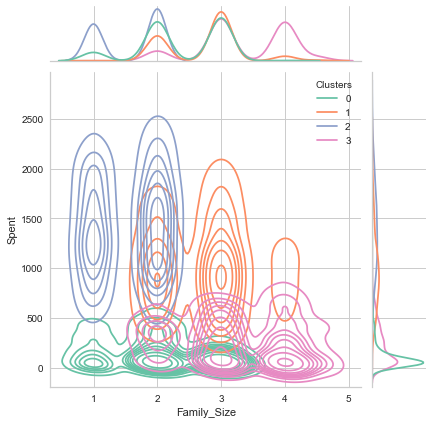

<Figure size 1080x360 with 0 Axes>

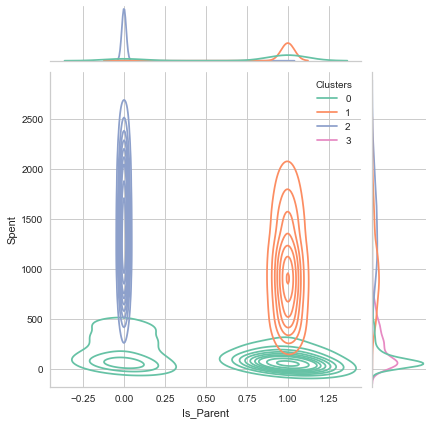

<Figure size 1080x360 with 0 Axes>

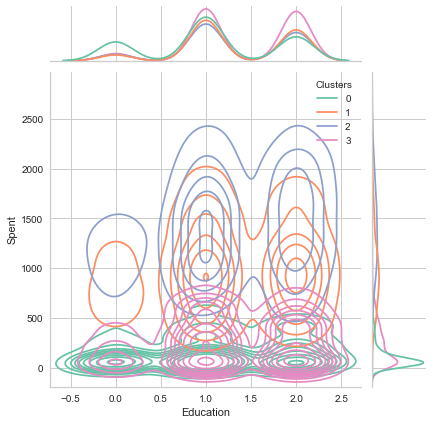

<Figure size 1080x360 with 0 Axes>

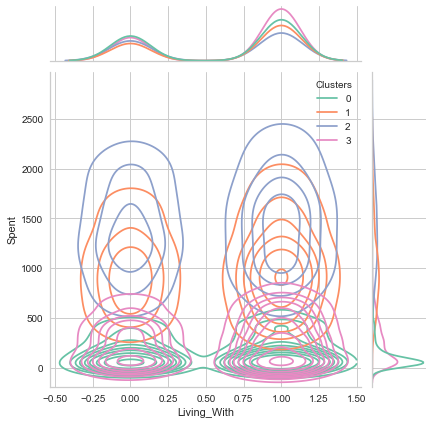

In [55]:
cols = ['Kidhome', 'Teenhome', 'Age', 'Children', 'Family_Size', 'Is_Parent', 'Education', 'Living_With']

for i in cols:
    plt.figure(figsize=(15,5))
    sns.jointplot(x=dataset_[i], y=dataset_['Spent'], hue=dataset_['Clusters'], kind='kde', palette='Set2')
plt.show()

In [62]:
dataset_ = dataset_.astype(int)

In [58]:
kmeans_model = KMeans(4)
kmeans_model.fit_predict(dataset_)

array([3, 0, 1, ..., 3, 3, 3])

In [67]:
pca_df_kmeans = pd.concat([dataset_,pd.DataFrame({'Clusters':kmeans_model.labels_})],axis=1)

In [69]:
X = dataset_.drop(['Clusters'], axis=1)
y = dataset_[['Clusters']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)

In [75]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 99   0   3   5]
 [  2  85   1   8]
 [  0   0  90   0]
 [  5   9   0 137]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       107
           1       0.90      0.89      0.89        96
           2       0.96      1.00      0.98        90
           3       0.91      0.91      0.91       151

    accuracy                           0.93       444
   macro avg       0.93      0.93      0.93       444
weighted avg       0.93      0.93      0.93       444



In [74]:
rf = RandomForestClassifier(criterion='entropy')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 97   1   2   7]
 [  0  92   1   3]
 [  1   0  89   0]
 [  4   6   0 141]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       107
           1       0.93      0.96      0.94        96
           2       0.97      0.99      0.98        90
           3       0.93      0.93      0.93       151

    accuracy                           0.94       444
   macro avg       0.95      0.95      0.95       444
weighted avg       0.94      0.94      0.94       444



In [76]:
xgb = XGBClassifier(criterion='entropy')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[09:53:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[[ 98   1   2   6]
 [  0  91   1   4]
 [  1   0  89   0]
 [  4   4   0 143]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       107
           1       0.95      0.95      0.95        96
           2       0.97      0.99      0.98        90
           3       0.93      0.95      0.94       151

    accuracy                           0.95       444
   macro avg       0.95      0.95      0.95       444
weighted avg       0.95      0.95      0.95       444



In [78]:
dataset_.to_csv('clustered_customer.csv')

In [80]:
filename = 'model.pkl'
pickle.dump(xgb, open(filename, 'wb'))
 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9481981981981982 % Acuuracy


# 

**About Cluster 0:**
* The majority of these people are parents
* At max have 3 members in the family
* They majorly have one kid and typically not tennagers
* Relatively younger

**About Cluster 1:**
* Definitely a parent
* At max have 4 members in the family and at least 2
* Most have a teeanger in home
* Single parents are a subset of this group
* Relatively older

**About Cluster 2:**
* Definitely not a parent
* At max are only 2 members in the family.
* A slight majority of couples over single people
* Span all ages
* high income and high spending

**About Cluster 3:**
* Definitely a parent
* At max have 5 members in the family and at least 2
* Majority of them have a teenager at home
* Relatively older

#### `Thank You`